In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')

df['Year'] = df['Year_of_Release'].dt.year

In [4]:
df['Year'] = df['Year'].astype(object)

In [5]:
df.dtypes

Name                       object
Platform                   object
Year_of_Release    datetime64[ns]
Genre                      object
Publisher                  object
NA_Sales                  float64
EU_Sales                  float64
JP_Sales                  float64
Other_Sales               float64
Global_Sales              float64
Critic_Score              float64
Critic_Count              float64
User_Score                float64
User_Count                float64
Developer                  object
Rating                     object
Year                       object
dtype: object

In [6]:
def first_four(num):
    return str(num)[:4]

In [7]:
df['Year'] = df['Year'].apply(first_four)

In [8]:
df.shape

(16719, 17)

In [9]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Year'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             16717 non-null  object        
 1   Platform         16719 non-null  object        
 2   Year_of_Release  16450 non-null  datetime64[ns]
 3   Genre            16717 non-null  object        
 4   Publisher        16665 non-null  object        
 5   NA_Sales         16719 non-null  float64       
 6   EU_Sales         16719 non-null  float64       
 7   JP_Sales         16719 non-null  float64       
 8   Other_Sales      16719 non-null  float64       
 9   Global_Sales     16719 non-null  float64       
 10  Critic_Score     8137 non-null   float64       
 11  Critic_Count     8137 non-null   float64       
 12  User_Score       7590 non-null   float64       
 13  User_Count       7590 non-null   float64       
 14  Developer        10096 non-null  objec

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Score,7590.0,7.125046,1.500006,0.00,6.40,7.50,8.20,9.70
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [12]:
df.corr()['Global_Sales'].sort_values()

User_Score      0.088139
Critic_Score    0.245471
User_Count      0.265012
Critic_Count    0.303571
JP_Sales        0.612300
Other_Sales     0.749242
EU_Sales        0.901239
NA_Sales        0.941010
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

<AxesSubplot:xlabel='NA_Sales', ylabel='Global_Sales'>

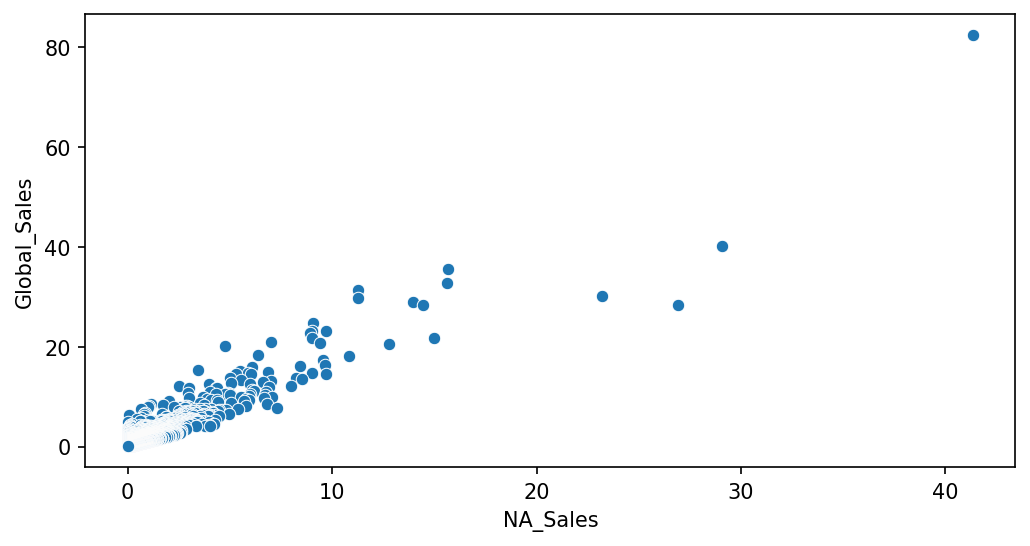

In [13]:
plt.figure(figsize=(8,4), dpi=150)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=df)

In [14]:
df[
    (df['NA_Sales'] > 40) & (df['Global_Sales'] > 80)
]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,2006


Missing Data

In [15]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1996


In [16]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
Year                  0
dtype: int64

In [17]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [18]:
percent_nan = percent_missing(df)
percent_nan

Name                0.011962
Genre               0.011962
Publisher           0.322986
Year_of_Release     1.608948
Developer          39.613613
Rating             40.486871
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         54.602548
User_Count         54.602548
dtype: float64

In [19]:
df[df['Publisher'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN,nan
1301,Triple Play 99,PS,NaT,Sports,NaN,0.81,0.55,0.00,0.10,1.46,NaN,NaN,NaN,NaN,NaN,NaN,nan
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007-01-01,Misc,NaN,0.87,0.32,0.00,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN,2007
2212,Bentley's Hackpack,GBA,2005-01-01,Misc,NaN,0.67,0.25,0.00,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN,2005
3148,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004-01-01,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN,2004
3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004-01-01,Misc,NaN,0.46,0.17,0.00,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN,2004
3755,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004-01-01,Misc,NaN,0.38,0.14,0.00,0.01,0.53,NaN,NaN,NaN,NaN,NaN,NaN,2004
4127,Sonic the Hedgehog,PS3,NaT,Platform,NaN,0.00,0.48,0.00,0.00,0.48,43.0,17.0,4.1,176.0,Sonic Team,E10+,nan
4508,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004-01-01,Misc,NaN,0.31,0.11,0.00,0.01,0.43,NaN,NaN,NaN,NaN,NaN,NaN,2004
4615,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004-01-01,Misc,NaN,0.30,0.11,0.00,0.01,0.42,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [20]:
df[df['Year_of_Release'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
183,Madden NFL 2004,PS2,NaT,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E,nan
377,FIFA Soccer 2004,PS2,NaT,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E,nan
456,LEGO Batman: The Videogame,Wii,NaT,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,nan
475,wwe Smackdown vs. Raw 2006,PS2,NaT,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN,nan
609,Space Invaders,2600,NaT,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaT,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,NaN,NaN,Oxygen Interactive,E10+,nan
16409,Freaky Flyers,GC,NaT,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T,nan
16452,Inversion,PC,NaT,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M,nan
16462,Hakuouki: Shinsengumi Kitan,PS3,NaT,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,nan


In [21]:
df = df.dropna(axis=0, subset=['Name','Year_of_Release','Genre','Publisher'])

In [22]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
Year                  0
dtype: int64

##Narratives
+ We have droped few rows with nan values
+ Some columns contains many NaN values

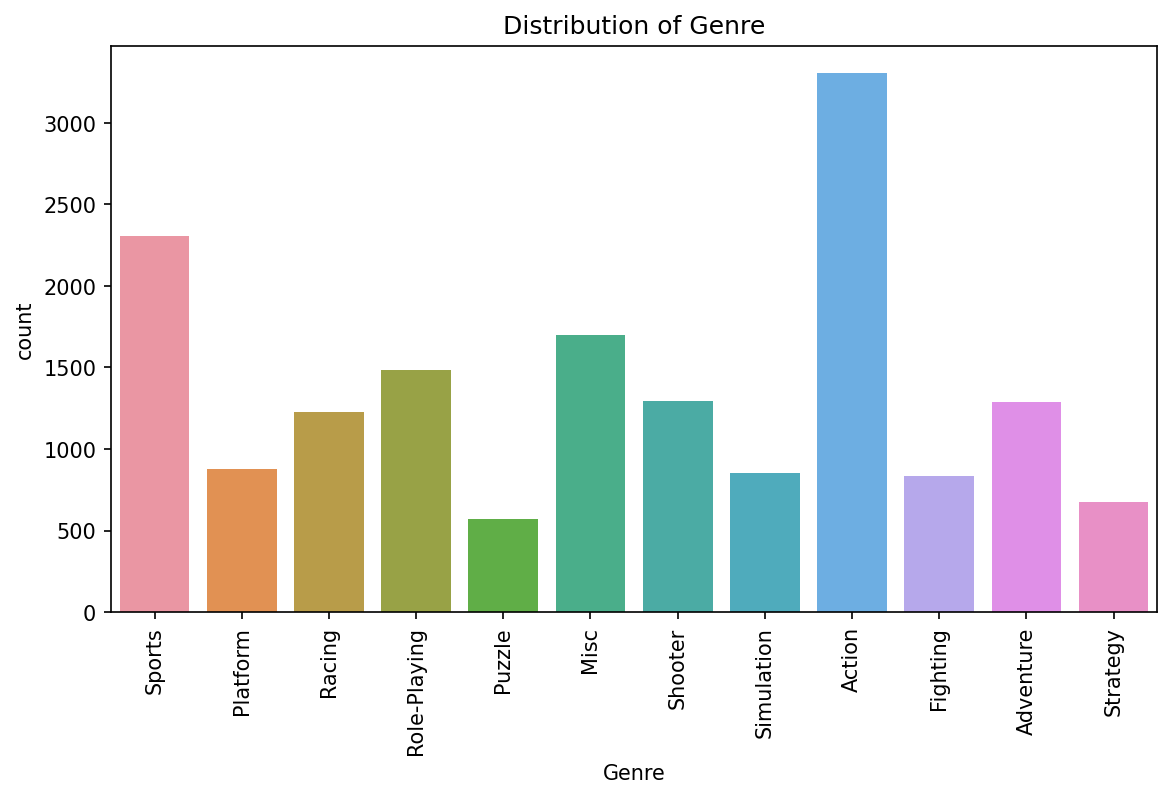

In [38]:
plt.figure(figsize=(9,5), dpi=150)
sns.countplot(data=df, x='Genre').set_title('Distribution of Genre')
plt.xticks(rotation=90)
plt.show()

In [24]:
all_sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

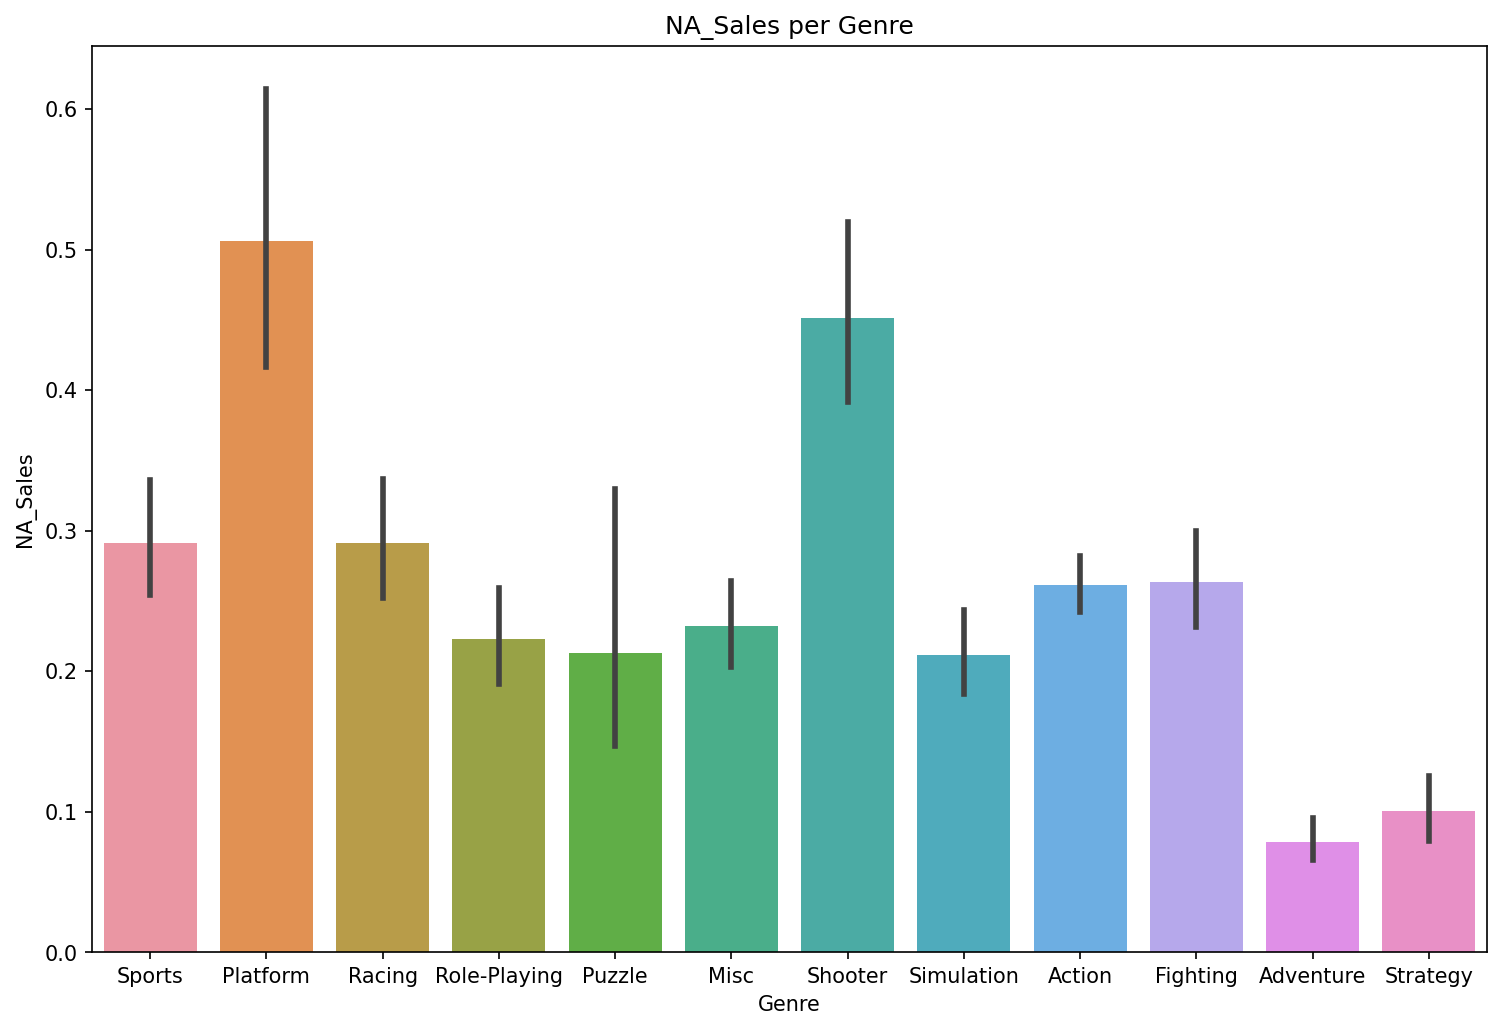

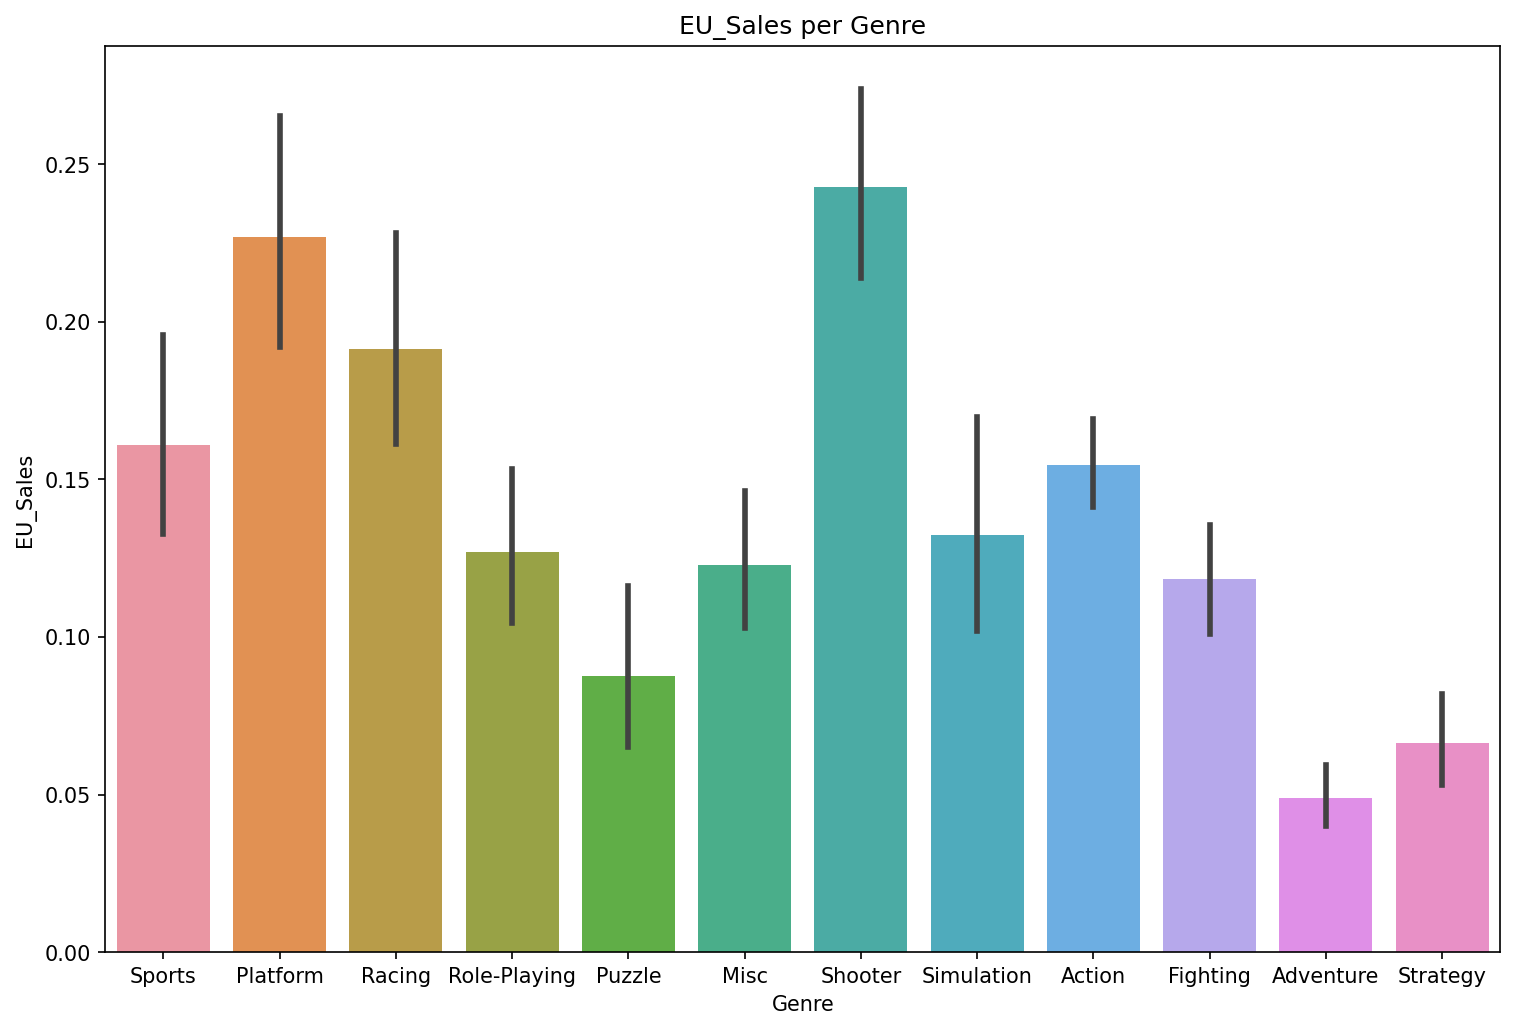

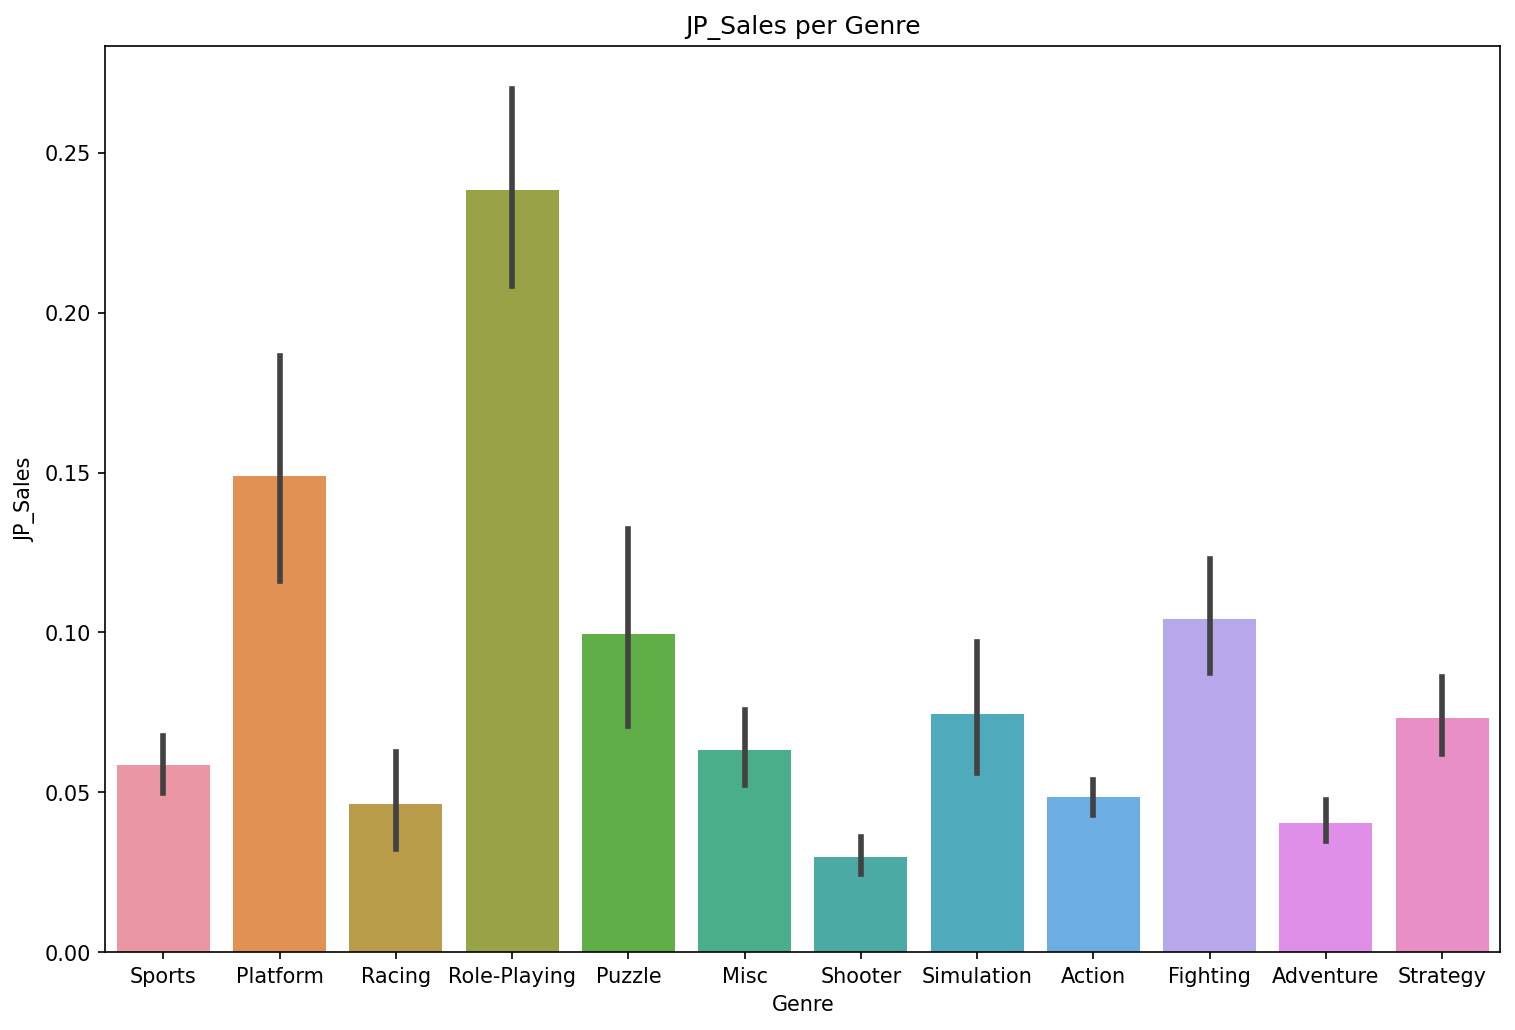

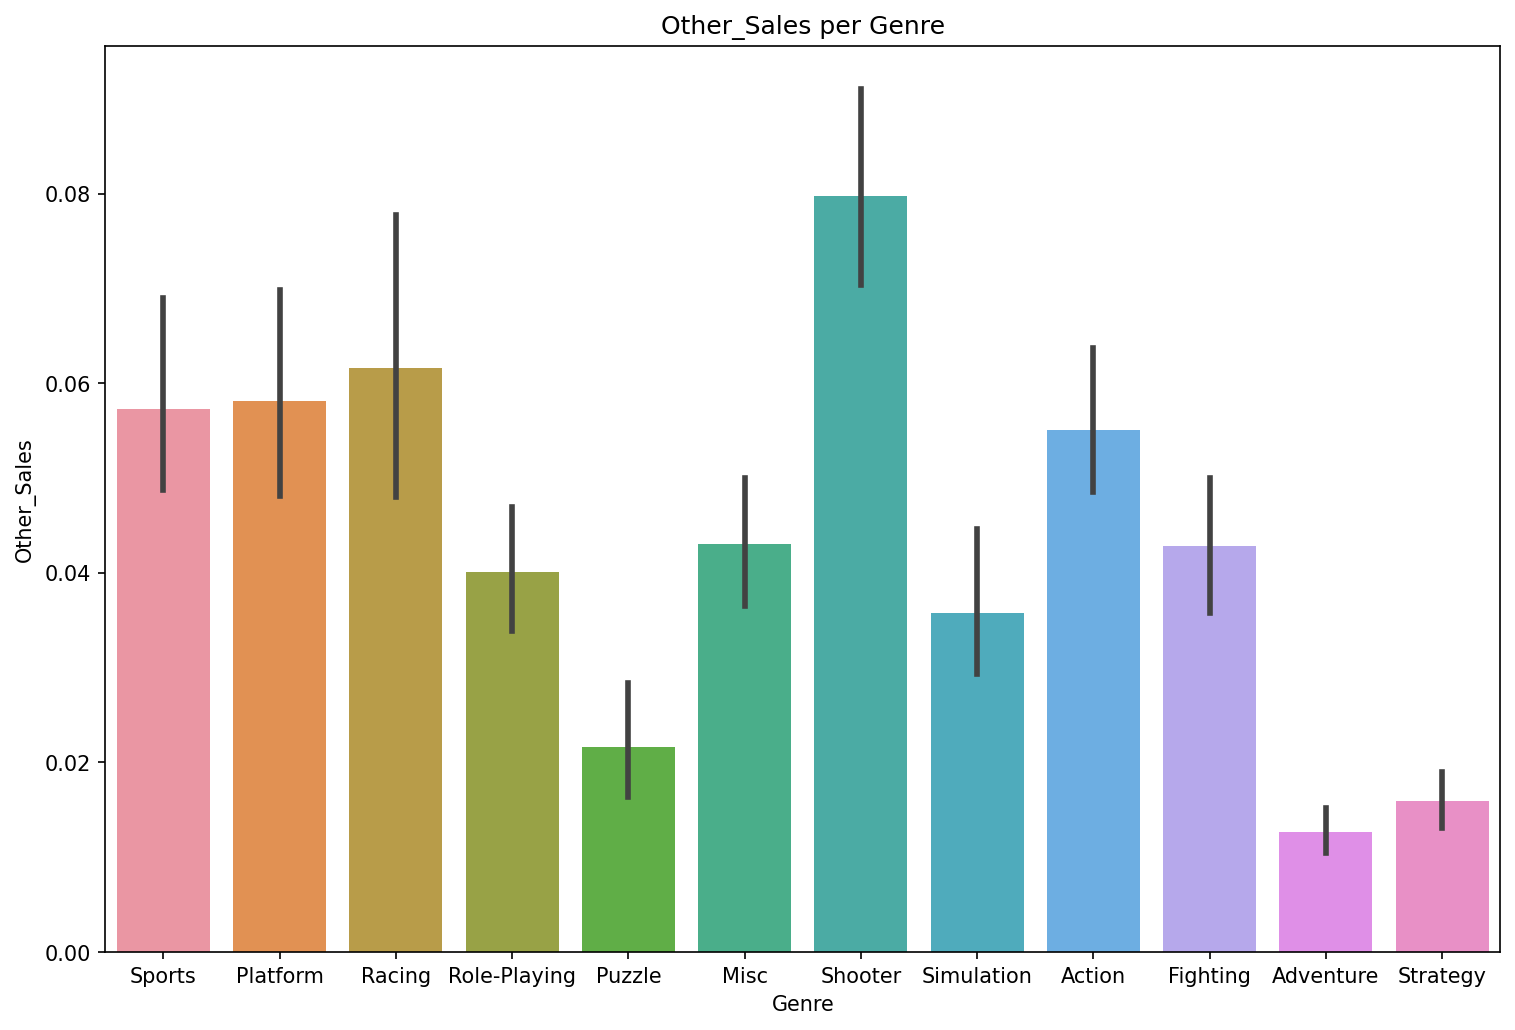

In [25]:
for i in all_sales:
    
    plt.figure(figsize=(12,8), dpi=150)
    sns.barplot(x='Genre', y=i, data=df).set_title(f'{i} per Genre')

In [27]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1996


In [28]:
df['Platform'].nunique()

31

<AxesSubplot:>

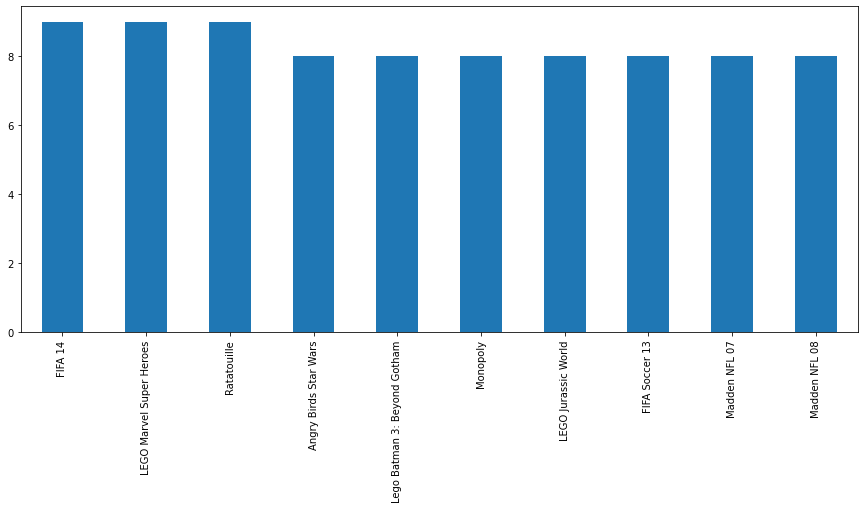

In [29]:
name = df['Name'].value_counts()[1:11]
name.plot(kind='bar', figsize=(15,6))

## Narratives 
+ These are the ten most common used platform out of 32 in all

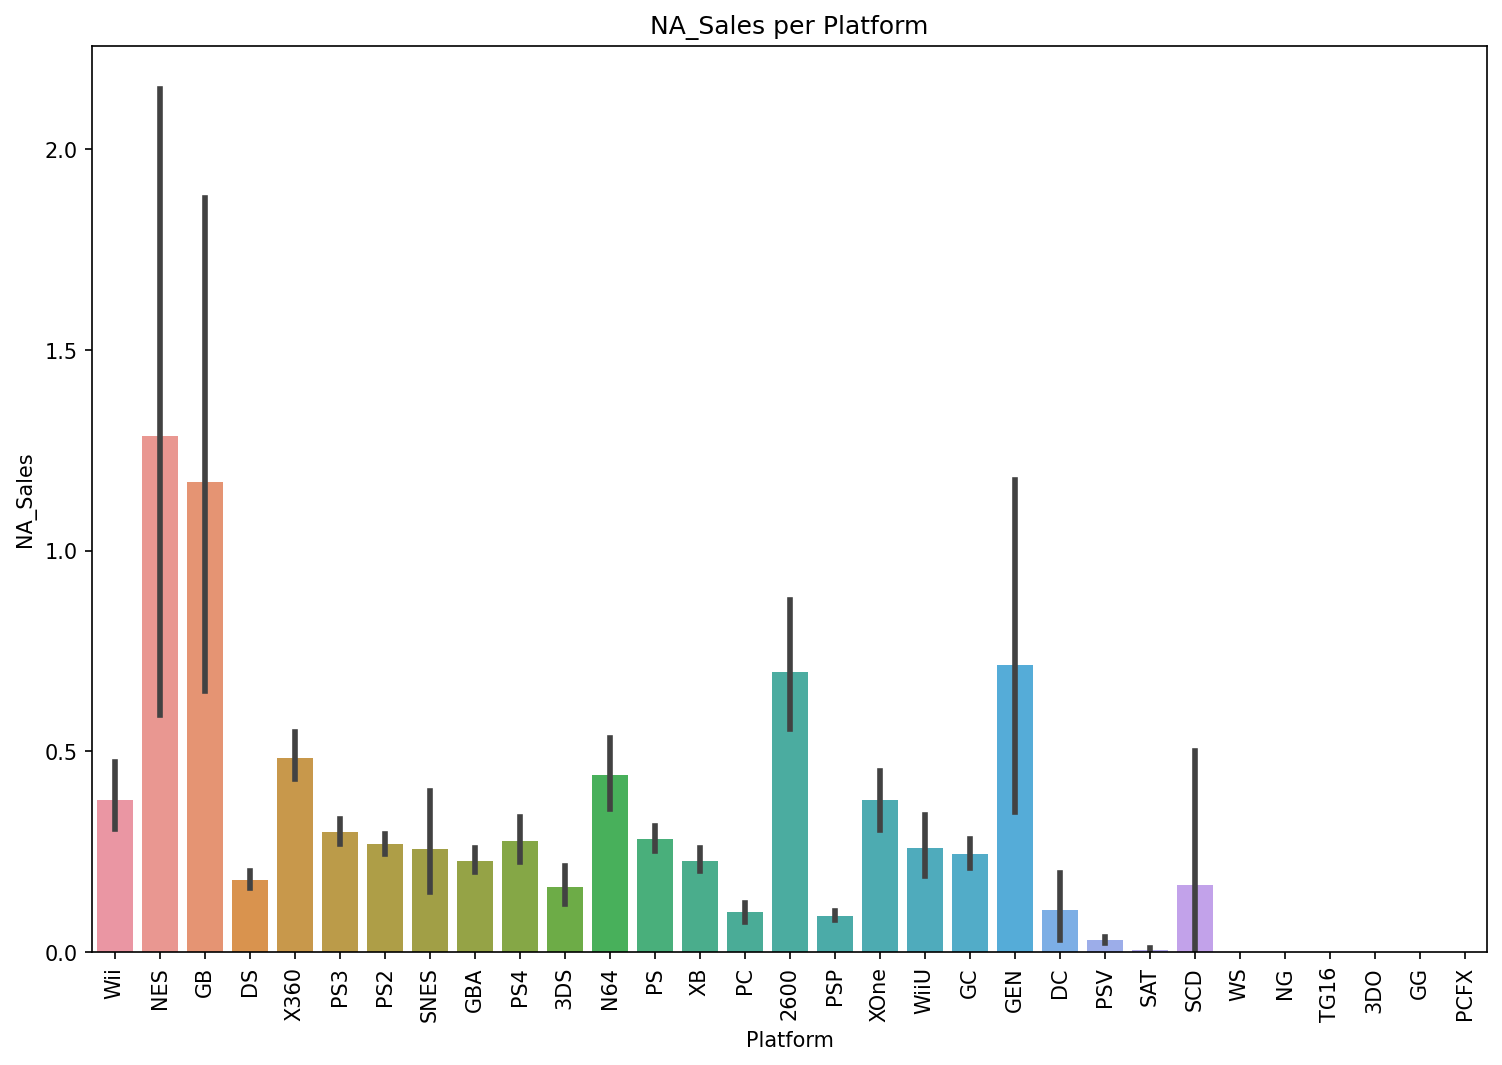

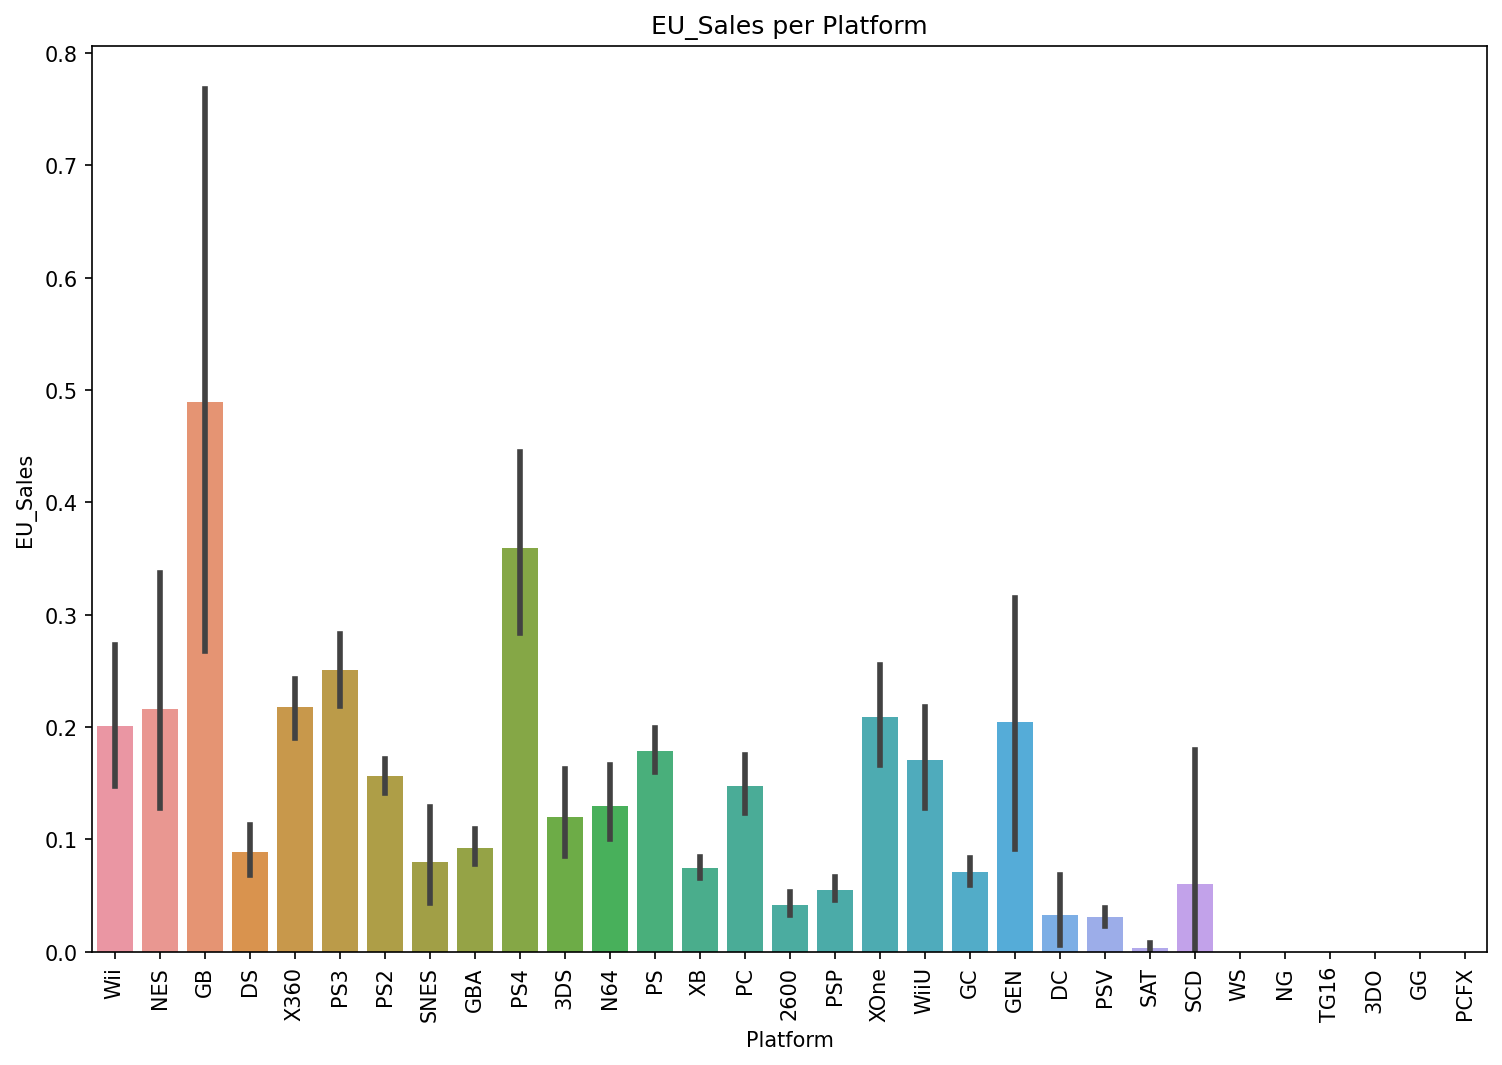

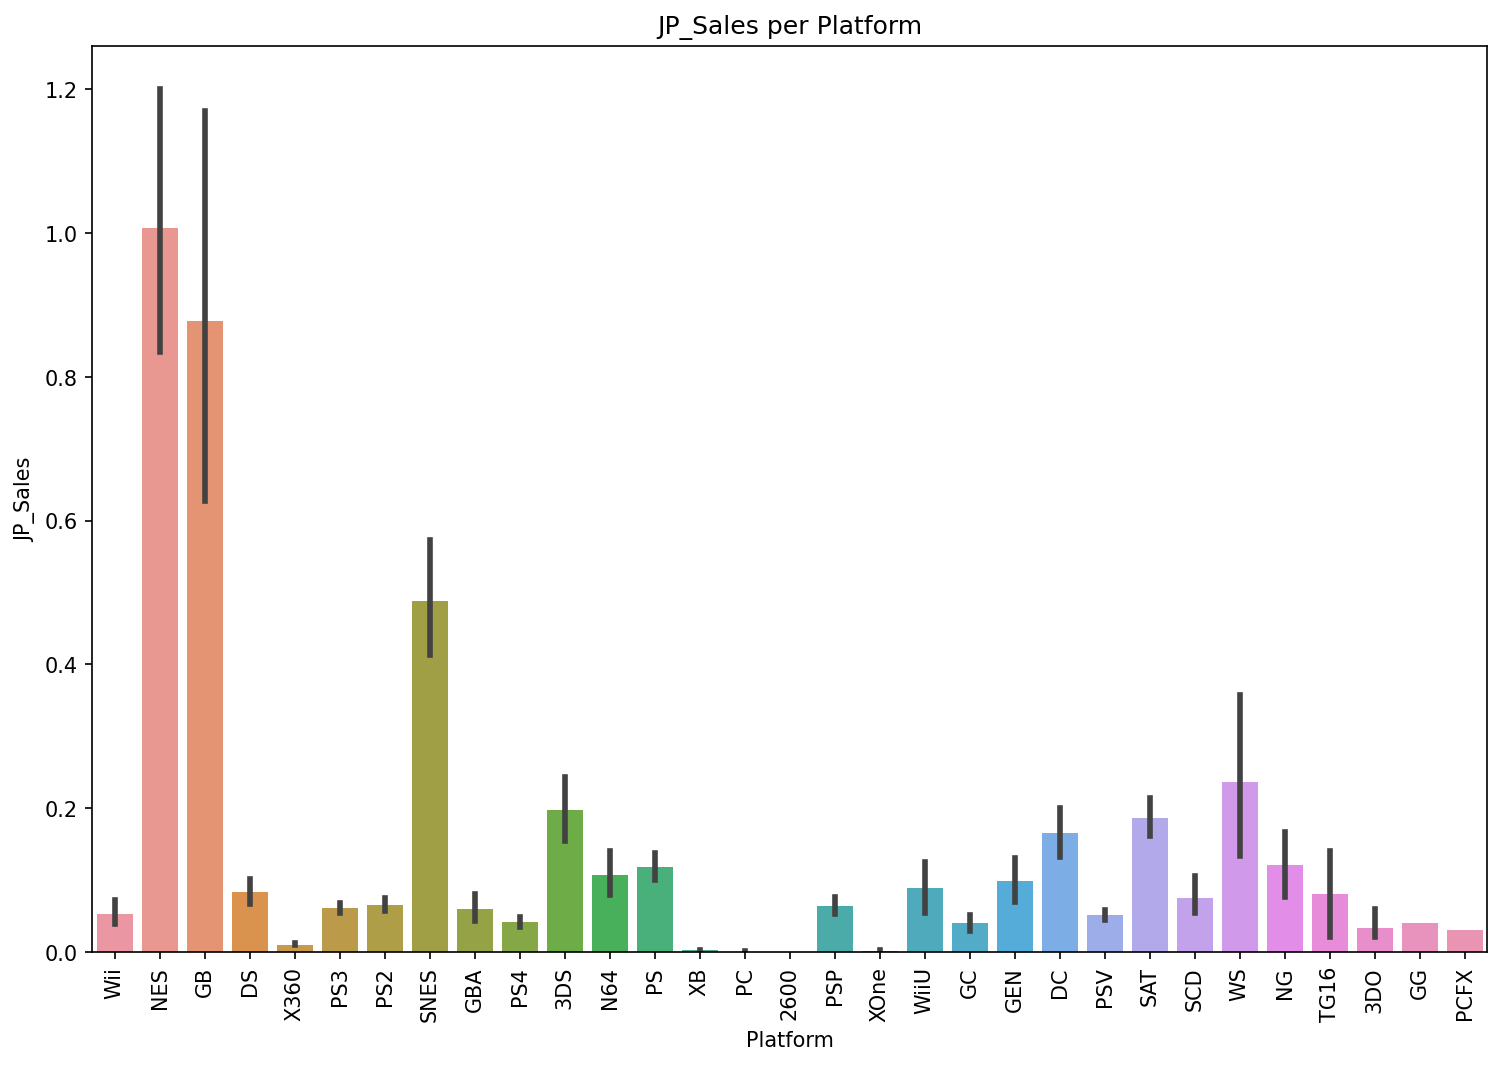

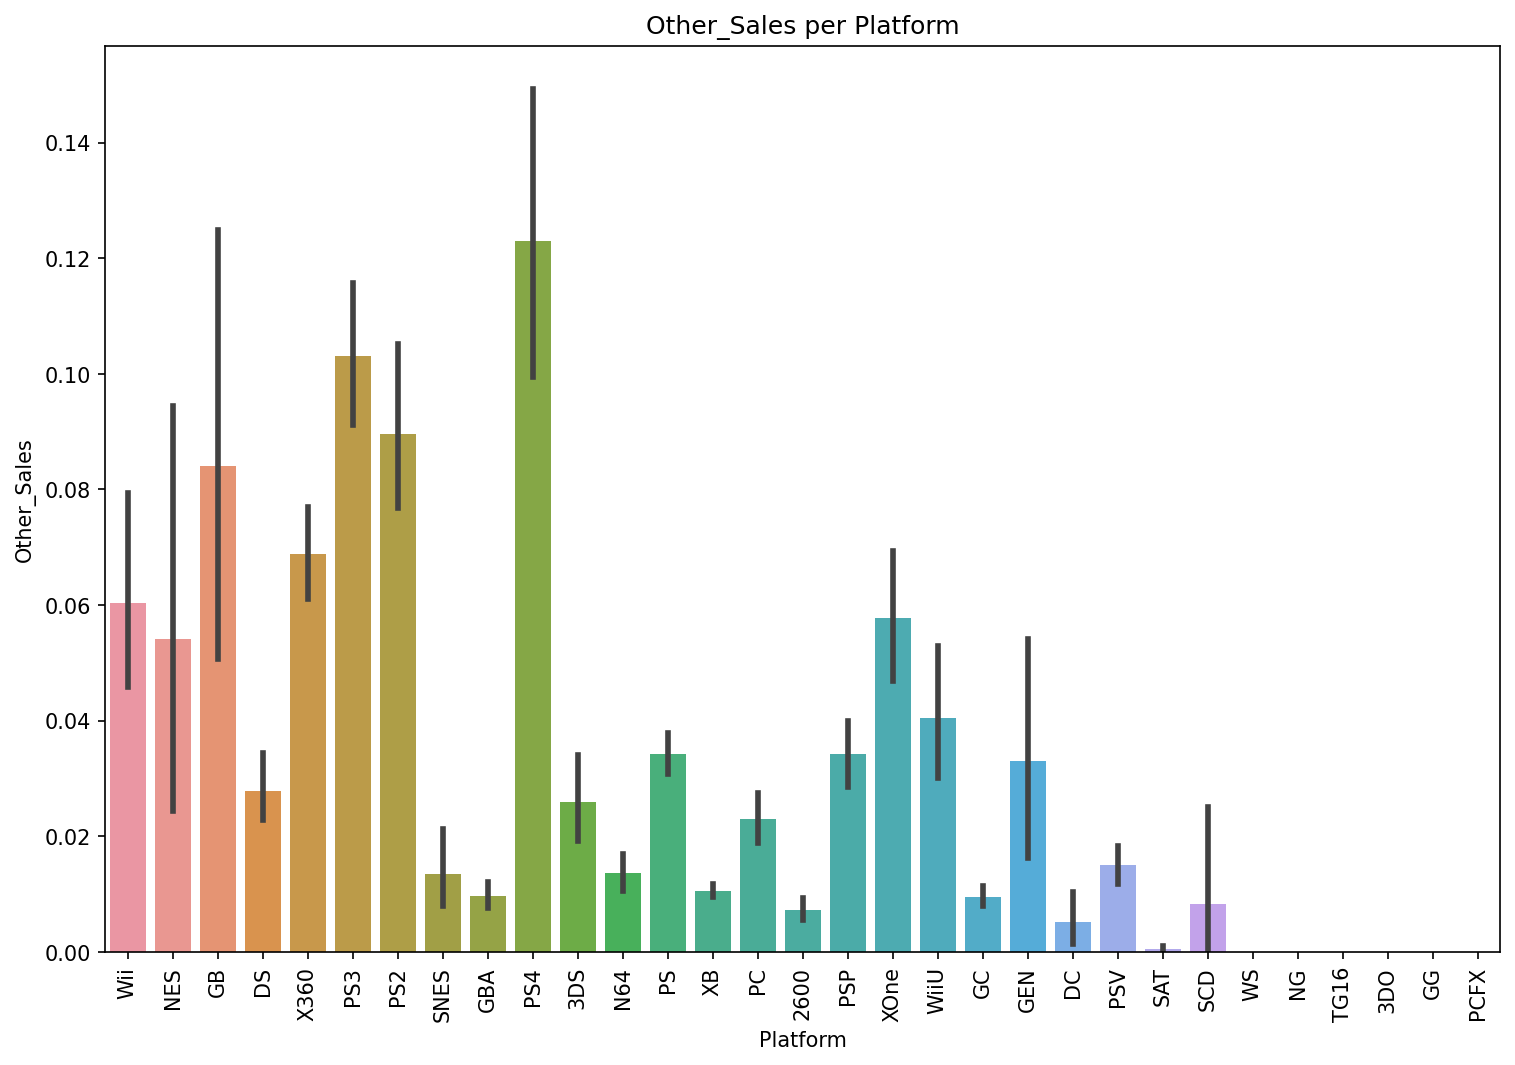

In [30]:
for i in all_sales:
    
    plt.figure(figsize=(12,8), dpi=150)
    sns.barplot(x='Platform', y=i, data=df).set_title(f'{i} per Platform')
    
    plt.xticks(rotation=90)
    plt.show()

## Narratives
+ North American sales performs well on NES platform and GB
+ Europes sales perform well on GB platform
+ Japan sales perform well on NES and GB platform
+ Other sales performs best on PS4 platform

In [31]:
plat = df.groupby('Platform').mean()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
plat.sort_values('NA_Sales', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
NES,1.285102,0.215816,1.006633,0.054184
GB,1.171546,0.489794,0.877526,0.084124
GEN,0.713704,0.204444,0.098889,0.032963
2600,0.696379,0.041897,0.000000,0.007241
X360,0.483555,0.217792,0.009984,0.068896
N64,0.439589,0.129842,0.106835,0.013639
Wii,0.378593,0.200871,0.053095,0.060428
XOne,0.377004,0.208866,0.001377,0.057773
PS3,0.298721,0.250544,0.060804,0.103055


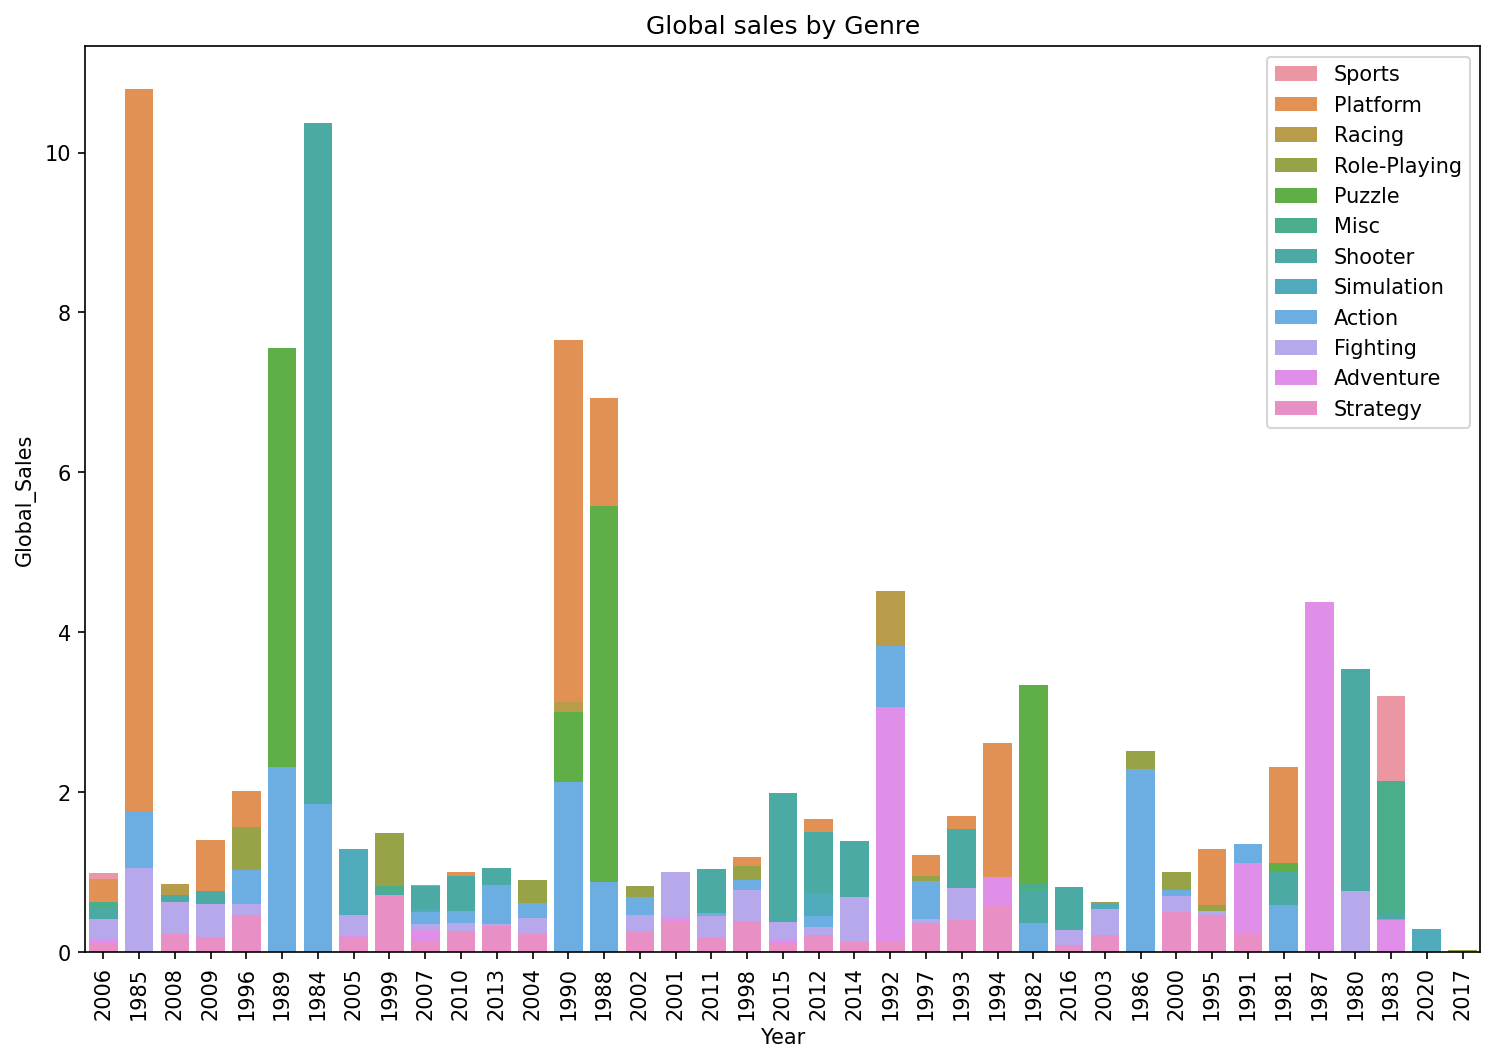

In [32]:
plt.figure(figsize=(12,8), dpi=150)
sns.barplot(x='Year', y='Global_Sales', data=df, hue='Genre', dodge=False, ci=None).set_title('Global sales by Genre')

plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

Sales by Country

In [33]:
all_year = df.groupby(["Year"]).agg({"sum"})[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
all_year.reset_index()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
,,sum,sum,sum,sum
0,1980,10.59,0.67,0.00,0.12
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70
5,1985,33.73,4.74,14.56,0.92
6,1986,12.50,2.84,19.81,1.93
7,1987,8.46,1.41,11.63,0.20
8,1988,23.87,6.59,15.76,0.99


C:\Users\JA\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1200x500 with 0 Axes>

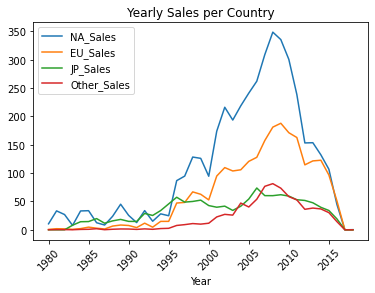

In [35]:
all_year = df.groupby(["Year"]).sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

plt.figure(figsize=(12,5), dpi=100)
all_year.plot(kind='line')
plt.title('Yearly Sales per Country')
plt.xticks(rotation=45)
plt.show()

In [36]:
year_sum = df.groupby(["Year"]).agg({"sum"}).reset_index()

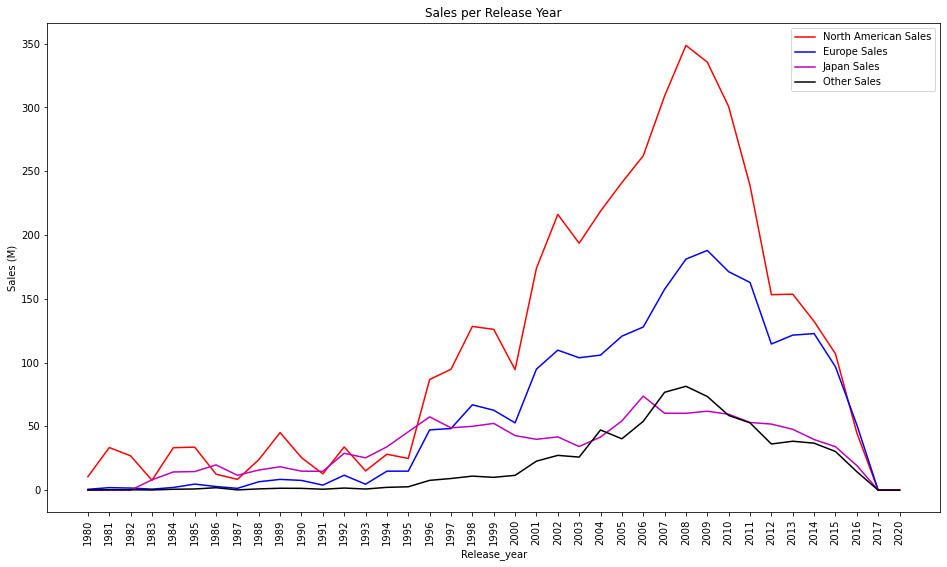

In [37]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(year_sum["Year"],
        year_sum["NA_Sales"],
        color="r",
        label="North American Sales");
ax.plot(year_sum["Year"],
        year_sum["EU_Sales"],
        color="b",
        label="Europe Sales");
ax.plot(year_sum["Year"],
        year_sum["JP_Sales"],
        color="m",
        label="Japan Sales");
ax.plot(year_sum["Year"],
        year_sum["Other_Sales"],
        color="k",
        label="Other Sales");

ax.set_title("Sales per Release Year")
plt.xlabel('Release_year')
plt.ylabel('Sales (M)')
plt.xticks(rotation=90)
ax.legend();

### Narratives

+ North America seems to have made the highest sales from 1980's to 2020
+ Followed by Europe, Other sales and Japan made the least sales.